 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [59]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [61]:
# Reading whale returns
whale_returns_path = Path('../Starter_Code/Resources/whale_returns.csv')
whale_returns_csv = pd.read_csv(whale_returns_path,index_col= 'Date', parse_dates=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [62]:
# Count nulls
whale_returns_csv.isnull().sum(axis = 0)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [63]:
# Drop nulls
whale_returns_csv.dropna(inplace=True)
whale_returns_csv

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [64]:
# Reading algorithmic returns
algorithmic_returns_path = Path('../Starter_Code/Resources/algo_returns.csv')
algorithmic_returns_csv = pd.read_csv(algorithmic_returns_path,index_col= 'Date', parse_dates=True)
algorithmic_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [65]:
# Count nulls
algorithmic_returns_csv.isnull().sum(axis = 0)

Algo 1    0
Algo 2    6
dtype: int64

In [66]:
# Drop nulls
algorithmic_returns_csv.dropna(inplace=True)
algorithmic_returns_csv

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [67]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path('../Starter_Code/Resources/sp_tsx_history.csv')
sp_tsx_history_csv = pd.read_csv(sp_tsx_history_path,index_col= 'Date', parse_dates=True)
sp_tsx_history_csv.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [68]:
# Check Data Types
type(sp_tsx_history_csv.head())

pandas.core.frame.DataFrame

In [69]:
# Fix Data Types
sp_tsx_history_csv['Close'] = sp_tsx_history_csv['Close'].str.replace('$', '')
sp_tsx_history_csv['Close'] = sp_tsx_history_csv['Close'].str.replace(',', '')
sp_tsx_history_csv.dropna(inplace= True)
sp_tsx_history_csv['Close'] = sp_tsx_history_csv['Close'].astype(float)
sp_tsx_history_csv['Close'].dtypes
sp_tsx_history_csv.head()

C:\Users\prabh\AppData\Local\Temp/ipykernel_16056/3239747740.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_csv['Close'] = sp_tsx_history_csv['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [70]:
# Calculate Daily Returns

sp_tsx_returns = sp_tsx_history_csv.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [71]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)

In [72]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns={'Close': 'TSX'})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [73]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([sp_tsx_returns, algorithmic_returns_csv,whale_returns_csv], axis="columns", join="inner")
daily_returns.head()

,TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

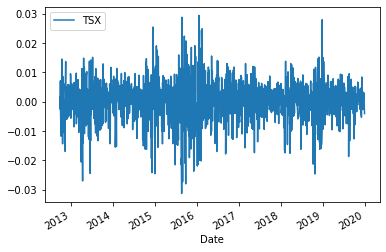

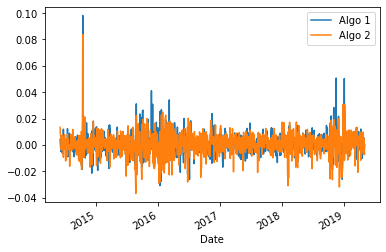

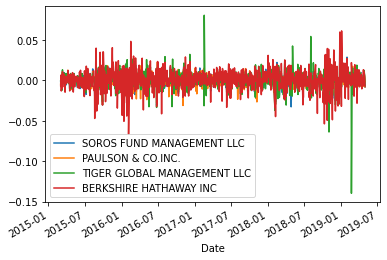

In [74]:
# Plot daily returns of all portfolios
sp_tsx_returns.plot()
algorithmic_returns_csv.plot()
whale_returns_csv.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

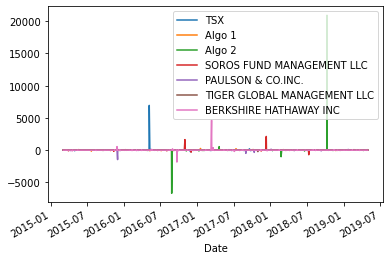

In [75]:
# Calculate cumulative returns of all portfolios
cumulative_returns = daily_returns.pct_change(1)
cumulative_returns.head() 

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

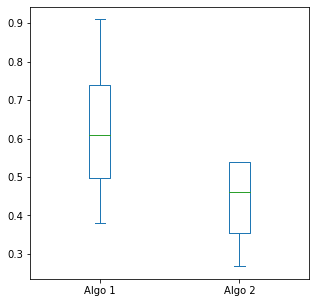

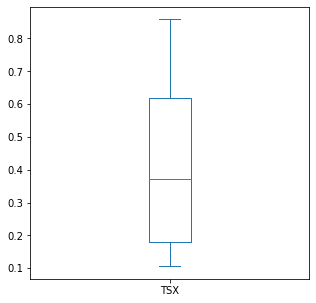

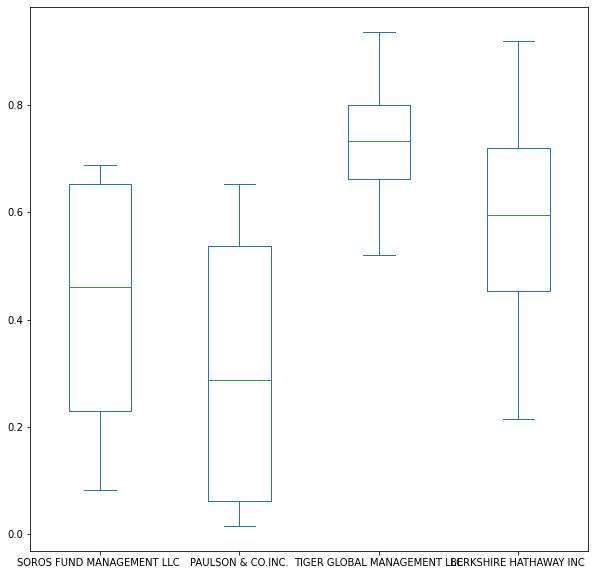

In [184]:
# Box plot to visually show risk
algorithmic_returns_csv.plot.box(figsize = (5,5))
sp_tsx_returns.plot.box(figsize = (5,5))
whale_returns_csv.plot.box(figsize = (10,10))


### Calculate Standard Deviations

In [77]:
# Calculate the daily standard deviations of all portfolios

algorithmic_returns_volatility = daily_returns.std()
algorithmic_returns_volatility.head()


TSX                          0.007034
Algo 1                       0.007589
Algo 2                       0.008326
SOROS FUND MANAGEMENT LLC    0.007828
PAULSON & CO.INC.            0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

<AxesSubplot:xlabel='Date'>

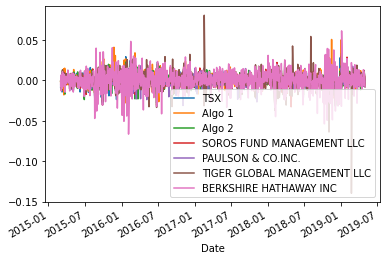

In [78]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_volatility = sp_tsx_returns.std()
sp_tsx_volatility.head()
# Determine which portfolios are riskier than the S&P TSX 60
daily_returns.plot()


### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized standard deviation (252 trading days)
volatility = daily_returns.std() * np.sqrt(252)
volatility = volatility.sort_values()
volatility

PAULSON & CO.INC.              0.110841
TSX                            0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

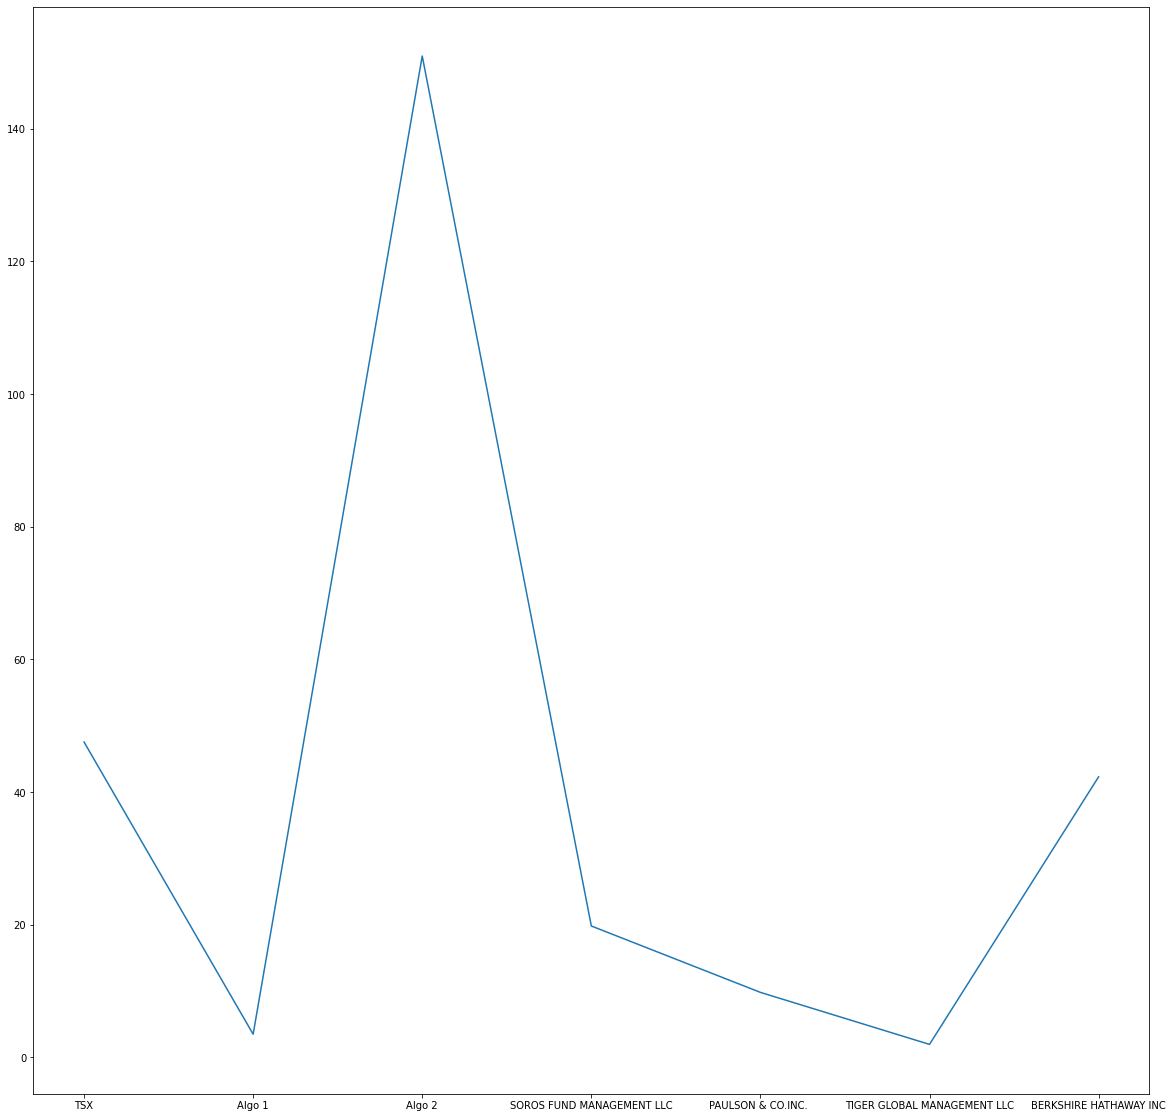

In [158]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cumulative_returns_sma_21 = cumulative_returns.rolling(window=21).mean()
cumulative_returns_sma_21.head()
# Plot the rolling standard deviation
cumulative_returns_sma_21_std = cumulative_returns_sma_21.std()
cumulative_returns_sma_21_std.plot(figsize = (20,20))

### Calculate and plot the correlation

<AxesSubplot:>

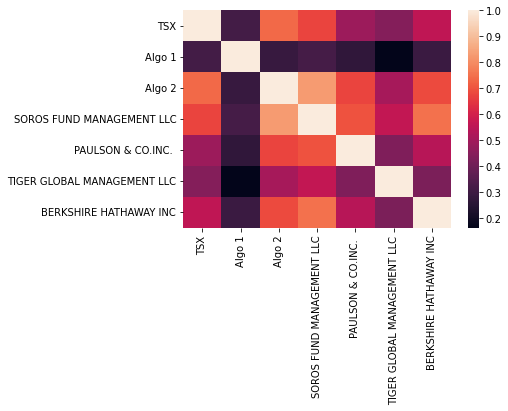

In [81]:
# Calculate the correlation
correlation = daily_returns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta'}, xlabel='Date'>

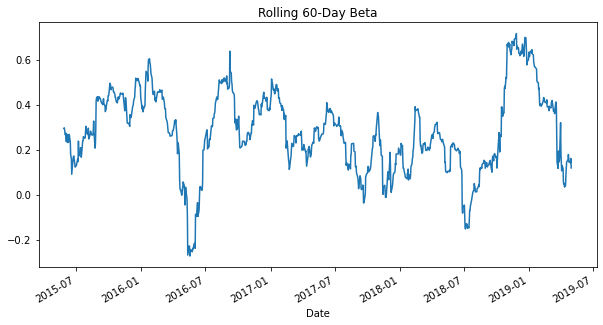

In [176]:
# Calculate covariance of a single portfolio
algorithmic_returns_covariance = daily_returns["Algo 1"].cov(daily_returns["TSX"])
algorithmic_returns_covariance_sixty = daily_returns["Algo 1"].rolling(window=60).cov(daily_returns["TSX"])
# Calculate variance of S&P TSX
tsx_variance = daily_returns["TSX"].var()
tsx_rolling_variance_sixty = daily_returns["TSX"].rolling(window=60).var()
                                                                                      
# Computing beta
algorithmic_returns_beta = algorithmic_returns_covariance / tsx_variance
algorithmic_returns_beta_sixty = algorithmic_returns_covariance_sixty/tsx_rolling_variance_sixty

#Plot beta trend
algorithmic_returns_beta_sixty.plot(figsize =(10,5),title="Rolling 60-Day Beta")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [161]:
# Use `ewm` to calculate the rolling window

daily_returns_ewm = daily_returns.ewm(com=21).mean()
daily_returns_ewm

,TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.005890,-0.005343,0.000773,0.000523,-0.000774,-0.001538,-0.001052
2015-03-05,-0.003366,-0.003812,0.002012,0.001742,0.000918,-0.000180,0.001662
2015-03-06,-0.005134,-0.004118,-0.001595,-0.000841,-0.000284,-0.002402,-0.002289
2015-03-09,-0.005445,-0.004409,-0.000960,-0.000529,0.000704,-0.000596,-0.002150
...,...,...,...,...,...,...,...
2019-04-25,0.001036,0.000406,0.000821,0.001431,-0.000008,-0.000750,0.001938
2019-04-26,0.001091,0.000523,0.001022,0.001736,0.000409,-0.000154,0.002324
2019-04-29,0.001006,0.000736,0.001104,0.001715,0.000514,0.000137,0.002456


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [106]:
# Annualized Sharpe Ratios
Sharpe_Ratio = daily_returns.mean() / daily_returns.std()
A_Sharpe_Ratio = Sharpe_Ratio * (252**0.50)
A_Sharpe_Ratio

TSX                            0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

<AxesSubplot:>

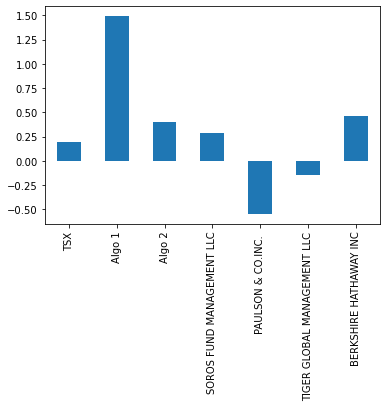

In [157]:
# Visualize the sharpe ratios as a bar plot
A_Sharpe_Ratio.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [131]:
# Reading data from 1st stock
shop_path = Path('../Starter_Code/Resources/shop_historical.csv')
shop_csv = pd.read_csv(shop_path,index_col= 'Date', parse_dates=True)
shop_csv.drop('Symbol', axis=1, inplace=True)
shop_csv = shop_csv.rename(columns={'Close': 'shop'})
shop_csv.head()

,shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [132]:
# Reading data from 2nd stock
otex_path = Path('../Starter_Code/Resources/otex_historical.csv')
otex_csv = pd.read_csv(otex_path,index_col= 'Date', parse_dates=True)
otex_csv.drop('Symbol', axis=1, inplace=True)
otex_csv = otex_csv.rename(columns={'Close': 'otex'})
otex_csv.head()

,otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [133]:
# Reading data from 3rd stock
I_path = Path('../Starter_Code/Resources/l_historical.csv')
I_csv = pd.read_csv(I_path,index_col= 'Date', parse_dates=True)
I_csv.drop('Symbol', axis=1, inplace=True)
I_csv = I_csv.rename(columns={'Close': 'I'})
I_csv.head()

,I
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [134]:
# Combine all stocks in a single DataFrame
combined = pd.concat([I_csv, otex_csv,shop_csv], axis="columns", join="inner")
combined.head()

,I,otex,shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [135]:
# Reset Date index
combined.reset_index(drop=True)
combined

,I,otex,shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [142]:
# Calculate daily returns
combined_daily_returns = combined.pct_change() 
# Drop NAs
combined_daily_returns.isnull().sum(axis = 1)
combined_daily_returns.dropna(inplace=True)
# Display sample data
combined_daily_returns

,I,otex,shop
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [187]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [145]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([combined_daily_returns, portfolio_returns], axis="columns", join="inner")

combined_returns.head()

,I,otex,shop,0
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999


In [146]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [147]:
# Calculate the annualized `std`
combined_returns.std()

I       0.009598
otex    0.013552
shop    0.030786
0       0.013657
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

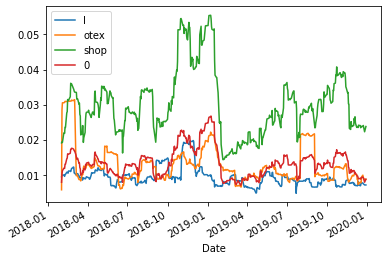

In [154]:
# Calculate rolling standard deviation
rolling_std = combined_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

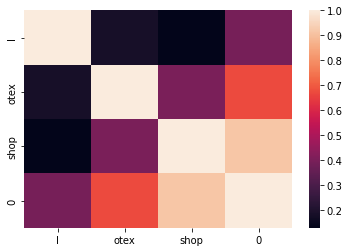

In [155]:
# Calculate and plot the correlation
_correlation = combined_returns.corr()
_correlation
# Display de correlation matrix
sns.heatmap(_correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta'}, xlabel='Date'>

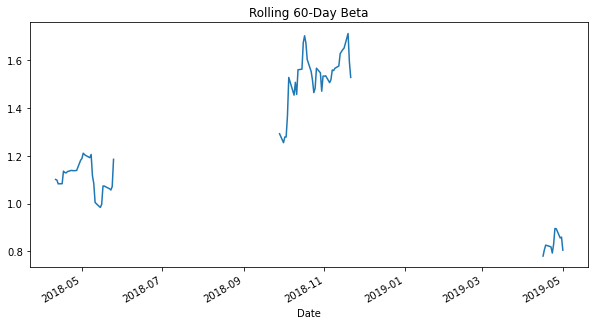

In [178]:
# Calculate and plot Beta
combined_returns_covariance_sixty = portfolio_returns.rolling(window=60).cov(daily_returns["TSX"])
# Calculate variance of S&P TSX
tsx_rolling_variance_sixty = daily_returns["TSX"].rolling(window=60).var()
                                                                                      
# Computing beta
combined_returns_beta_sixty = combined_returns_covariance_sixty/tsx_rolling_variance_sixty

#Plot beta trend
combined_returns_beta_sixty.plot(figsize =(10,5),title="Rolling 60-Day Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [180]:
# Calculate Annualized Sharpe Ratios
CSharpe_Ratio = combined_returns.mean() / combined_returns.std()
B_Sharpe_Ratio = CSharpe_Ratio * (252**0.50)


<AxesSubplot:>

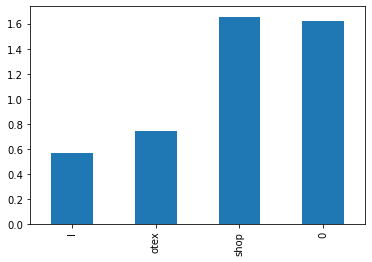

In [181]:
# Visualize the sharpe ratios as a bar plot
B_Sharpe_Ratio.plot(kind="bar")

### How does your portfolio do?

Write your answer here!